In [3]:
# Libraries for file and directory operations
import os
import shutil
import glob
import random

# avoid warnings
import warnings 
warnings. filterwarnings('ignore')

# Library for data processing
import numpy as np
import math
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

# Libraries for deep learning model
import tensorflow as tf

In [4]:
# dataset path
dataset_path = './fruits'

# Define training and test folders
training_folder_path = "./fruits/train"
test_folder_path = "./fruits/test"

In [5]:
# Counting total labels
def count_labels(folder_path):
    label_count = 0
    for _, dirs, _ in os.walk(folder_path):
        label_count += len(dirs)
        break  # Only count the top-level directories and exit the loop
    return label_count

num_labels = count_labels(training_folder_path)
print(f"Number of labels (folders) in the training dataset: {num_labels}")

Number of labels (folders) in the training dataset: 22


In [6]:
# Get a list of all labels (subfolder names) within the training folder
labels = [label for label in os.listdir(training_folder_path) if os.path.isdir(os.path.join(training_folder_path, label))]

# Sort the labels alphabetically
sorted_labels = sorted(labels)

# Print the list of labels
print("Sorted Labels:")
for label in sorted_labels:
    print(label)

Sorted Labels:
apple
avocado
banana
blueberry
cantaloupe
cherry
dragonfruit
emblic
grape
guava
jackfruit
kiwi
lychee
mango
orange
papaya
pear
pineapple
pomegranate
raspberry
strawberry
watermelon


In [7]:
 # creating a folder for filtered dataset in the working directory

def create_folders(destination_path):
    # Create "filtered_dataset" folder directly
    os.makedirs(destination_path, exist_ok=True)

    # Create "training" and "test" folders within "filtered_dataset"
    training_path = os.path.join(destination_path, "training")
    test_path = os.path.join(destination_path, "test")
    os.makedirs(training_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

if __name__ == "__main__":
    destination_path = "./filtered_dataset"
    create_folders(destination_path)

    print(f"filtered_dataset folder created successfully in {destination_path}")
    print(f"Training folder created successfully in {destination_path}.")
    print(f"Test folder created successfully in {destination_path}.")

filtered_dataset folder created successfully in ./filtered_dataset
Training folder created successfully in ./filtered_dataset.
Test folder created successfully in ./filtered_dataset.


In [8]:
def copy_selected_folders(source_path, destination_path, selected_fruits):
    if not os.path.exists(source_path):
        print("Source path does not exist.")
        return

    source_folders = os.listdir(source_path)
    for fruit_pattern in selected_fruits:
        fruit_pattern = fruit_pattern.lower()  # Make sure the fruit pattern is in lowercase
        fruit_folder_matches = [f for f in source_folders if f.lower().startswith(fruit_pattern)]

        if not fruit_folder_matches:
            print(f"No variants found for '{fruit_pattern}'.")
            continue

        for source_folder in fruit_folder_matches:
            fruit_name = source_folder
            source_folder = os.path.join(source_path, source_folder)
            destination_folder = os.path.join(destination_path, fruit_name)
            try:
                shutil.copytree(source_folder, destination_folder)
                print(f"Fruit '{fruit_name}' copied successfully in {destination_path}.")
            except FileExistsError:
                print(f"Fruit '{fruit_name}' already exists in the destination path.")
                
# copy fruit folders to training folder
if __name__ == "__main__":
    source_path = "./fruits/train"
    destination_path = ".//filtered_dataset/train"
    
    # Selecting the fruit names to copy all variants
    selected_fruits = ["apple","canana", "cherry","guava","grape","lychee","pineapple","strawberry","raspberry","blueberry","kiwi"]
  
    copy_selected_folders(source_path, destination_path, selected_fruits)
    
# copy fruit folders to test folder
if __name__ == "__main__":
    source_path = "./fruits/test"
    destination_path = "./filtered_dataset/test"
    
    # Selecting the fruit names to copy all variants
    selected_fruits = ["apple","banana", "cherry","guava","grape","lychee","pineapple","strawberry","raspberry","blueberry","kiwi"] 
  
    copy_selected_folders(source_path, destination_path, selected_fruits)

Fruit 'apple' already exists in the destination path.
No variants found for 'canana'.
Fruit 'cherry' already exists in the destination path.
Fruit 'guava' already exists in the destination path.
Fruit 'grape' already exists in the destination path.
Fruit 'lychee' already exists in the destination path.
Fruit 'pineapple' already exists in the destination path.
Fruit 'strawberry' already exists in the destination path.
Fruit 'raspberry' already exists in the destination path.
Fruit 'blueberry' already exists in the destination path.
Fruit 'kiwi' already exists in the destination path.
Fruit 'apple' already exists in the destination path.
Fruit 'banana' already exists in the destination path.
Fruit 'cherry' already exists in the destination path.
Fruit 'guava' already exists in the destination path.
Fruit 'grape' already exists in the destination path.
Fruit 'lychee' already exists in the destination path.
Fruit 'pineapple' already exists in the destination path.
Fruit 'strawberry' alread

In [9]:
training_subset="./fruits/train"
test_subset="./fruits/test"

# function to count images in each folder
def count_images_per_label(folder_path):
    label_counts = {
        label: len(os.listdir(os.path.join(folder_path, label)))
        for label in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, label))
    }

    return label_counts

if __name__ == "__main__":
    # Count images in training folders
    training_label_counts = count_images_per_label(training_subset)
    test_label_counts = count_images_per_label(test_subset)
    sorted_training_label_counts = sorted(training_label_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_test_label_counts = sorted(test_label_counts.items(), key=lambda x: x[1], reverse=True)
print("Training Label Counts (sorted by count):")
for label, count in sorted_training_label_counts:
    print(f"{label}: {count}")
print("Test Label Counts (sorted by count):")
for label, count in sorted_test_label_counts:
    print(f"{label}: {count}")

Training Label Counts (sorted by count):
apple: 1312
avocado: 1312
banana: 1312
blueberry: 1312
cantaloupe: 1312
cherry: 1312
grape: 1312
guava: 1312
lychee: 1312
mango: 1312
orange: 1312
papaya: 1312
pear: 1312
pineapple: 1312
pomegranate: 1312
raspberry: 1312
strawberry: 1312
watermelon: 1312
kiwi: 1311
emblic: 1304
dragonfruit: 1301
jackfruit: 1300
Test Label Counts (sorted by count):
pear: 1064
apple: 1056
grape: 908
cherry: 820
banana: 625
strawberry: 593
cantaloupe: 521
pineapple: 501
avocado: 494
mango: 494
guava: 370
papaya: 369
raspberry: 368
lychee: 367
pomegranate: 366
kiwi: 358
watermelon: 356
blueberry: 354
orange: 324
dragonfruit: 207
jackfruit: 206
emblic: 204


In [10]:
#counting number of images
def count_total_images(folder_path):
    total_images = 0
    for _, _, files in os.walk(folder_path):
        total_images += len(files)
    return total_images

total_images_count = count_total_images(dataset_path)
total_train_images_count = count_total_images(training_subset)
total_test_images_count = count_total_images(test_subset)

#Display total number of images in each folder of the dataset
print(f"Total number of images in the main dataset: {total_images_count}")
print(f"Total number of images in the training dataset: {total_train_images_count}")
print(f"Total number of images in the test dataset: {total_test_images_count}")

Total number of images in the main dataset: 39924
Total number of images in the training dataset: 28832
Total number of images in the test dataset: 10925


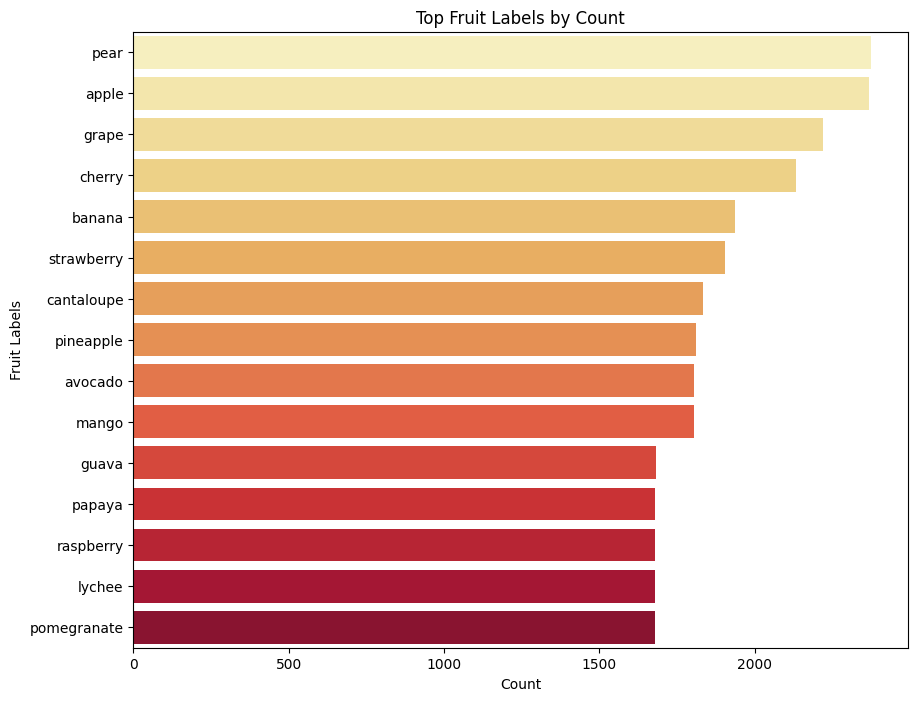

In [11]:
# Combine the training and test label counts into a single dictionary
combined_label_counts = {
    label: training_label_counts.get(label, 0) + test_label_counts.get(label, 0)
    for label in set(list(training_label_counts.keys()) + list(test_label_counts.keys()))
}

# Create a DataFrame to hold the combined fruit counts
df_fruit_counts = pd.DataFrame({"Fruit Labels": list(combined_label_counts.keys()), "Count": list(combined_label_counts.values())})

# Sort the DataFrame by the counts in descending order
df_fruit_counts = df_fruit_counts.sort_values(by="Count", ascending=False)

# Select the top 15 fruit labels by count
top_15_fruits = df_fruit_counts.head(15)

# Plot the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y="Fruit Labels", data=top_15_fruits, palette="YlOrRd")
plt.xlabel("Count")
plt.ylabel("Fruit Labels")
plt.title("Top Fruit Labels by Count")
plt.show()

In [12]:
BATCH_SIZE = 32
IMAGE_SIZE = 100
CHANNELS = 3
EPOCHS = 10

In [13]:
# training dataset pipeline
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_subset,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 28832 files belonging to 22 classes.


In [14]:
#print training labels
tr_class_names = train_dataset.class_names
tr_class_names

['apple',
 'avocado',
 'banana',
 'blueberry',
 'cantaloupe',
 'cherry',
 'dragonfruit',
 'emblic',
 'grape',
 'guava',
 'jackfruit',
 'kiwi',
 'lychee',
 'mango',
 'orange',
 'papaya',
 'pear',
 'pineapple',
 'pomegranate',
 'raspberry',
 'strawberry',
 'watermelon']

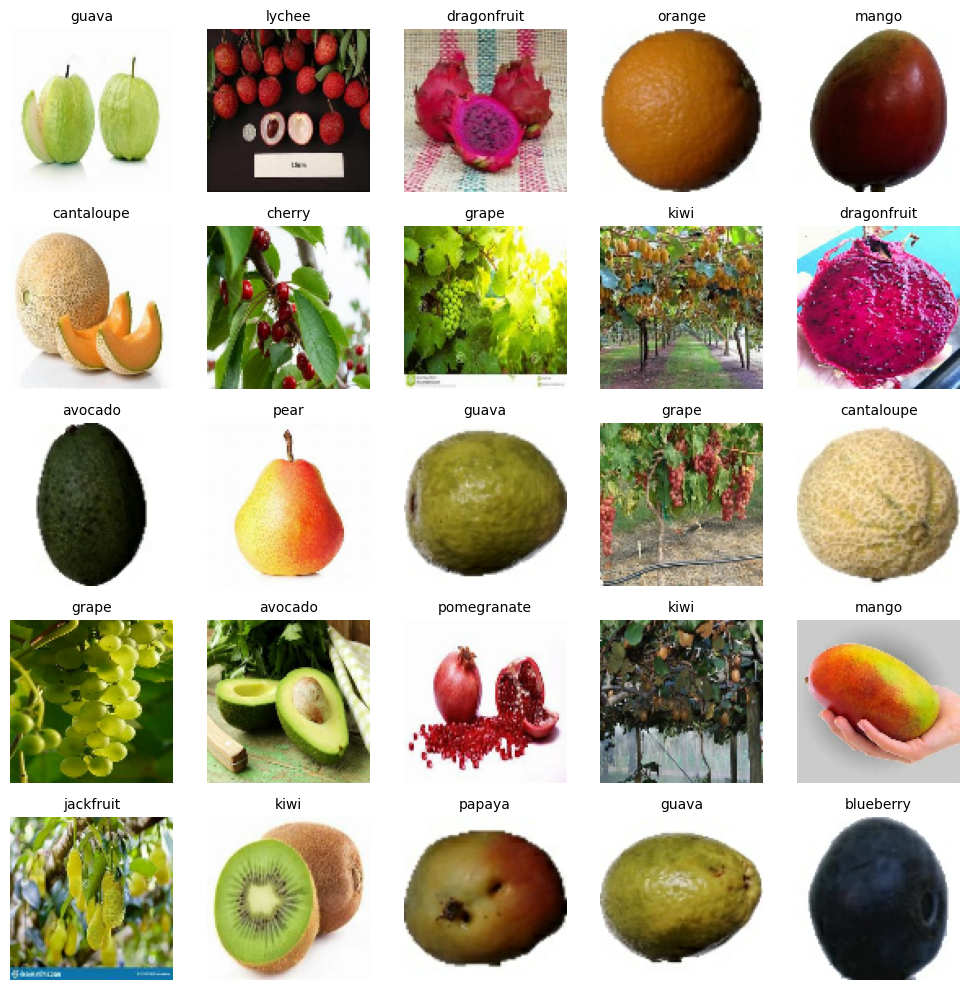

In [15]:
#visualizing sample images from the dataset
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(9):
    for i in range(25):
        ax = plt.subplot(5,5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(tr_class_names[labels_batch[i]], fontsize=10)
        plt.axis("off")

plt.tight_layout()
plt.show()

In [16]:
# define a function to split the dataset 
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=1234)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)

    return train_ds, val_ds

In [17]:
train_ds, val_ds = get_dataset_partitions_tf(train_dataset)

In [18]:
#print length of each set
print("Training dataset length",len(train_ds))
print("Validation dataset length",len(val_ds))

Training dataset length 720
Validation dataset length 180


In [19]:
# Optimization for Training and Validation Datasets by caching and shuffling
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
# resize and rescaling images to a specified size 
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1./255)
])

In [21]:
# prefetching the training data to optimize pipeline
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
# Defining the shape of the input data batch for CNN
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Number of outputs
n_classes = len(tr_class_names)
n_classes

22

In [23]:
# CNN model
model = tf.keras.Sequential([
    resize_and_rescale,
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [55]:
model = tf.keras.models.load_model('fruits_classification_2.keras')

In [56]:
# Review the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 100, 100, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 100, 100, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 50, 50, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 48, 48, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 24, 24, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 22, 22, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 11, 11, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 9, 9, 128)        │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 4, 4, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 2, 2, 256)        │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 1, 1, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 512)              │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 512)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 22)               │        11,286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,396,398 (5.33 MB)

 Trainable params: 698,198 (2.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 698,200 (2.66 MB)

In [38]:
# specifying the optimizer and model metrics
model.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [39]:
# saving the model training history
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS,
  steps_per_epoch=200,
  validation_steps=100
)

Epoch 1/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 47s 224ms/step - accuracy: 0.5519 - loss: 1.4686 - val_accuracy: 0.6531 - val_loss: 1.1482
Epoch 2/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 38s 188ms/step - accuracy: 0.6137 - loss: 1.2577 - val_accuracy: 0.6531 - val_loss: 1.1288
Epoch 3/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 186ms/step - accuracy: 0.6387 - loss: 1.1713 - val_accuracy: 0.6481 - val_loss: 1.1430
Epoch 4/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 27s 134ms/step - accuracy: 0.6674 - loss: 1.1137 - val_accuracy: 0.7253 - val_loss: 0.9117
Epoch 5/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 37s 186ms/step - accuracy: 0.6776 - loss: 1.0667 - val_accuracy: 0.7034 - val_loss: 1.0016
Epoch 6/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 36s 181ms/step - accuracy: 0.7020 - loss: 0.9765 - val_accuracy: 0.7241 - val_loss: 0.9239
Epoch 7/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 39s 193ms/step - accuracy: 0.7158 - loss: 0.9535 - val_accuracy: 0.7184 - val_loss: 0.9194
Epoch 8/10
200/200 ━━━━━━━━━━━━━━━━━━━━ 25s 124ms/step - accuracy: 0.7280 - loss: 0

In [54]:
tf.keras.models.save_model(model, 'fruits_classification_2.keras')

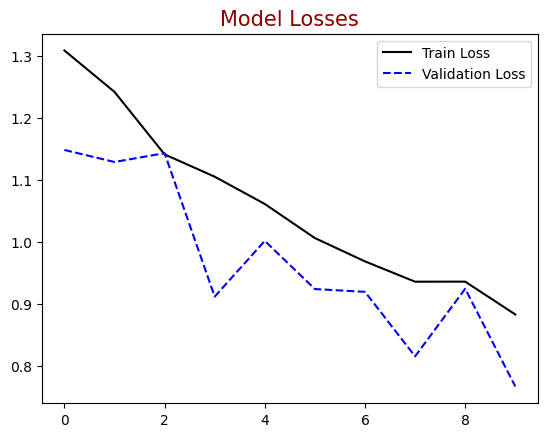

In [42]:
#Plotting train & validation loss
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "blue", linestyle="dashed")
plt.title("Model Losses", color = "darkred", size = 15)
plt.legend()
plt.show()

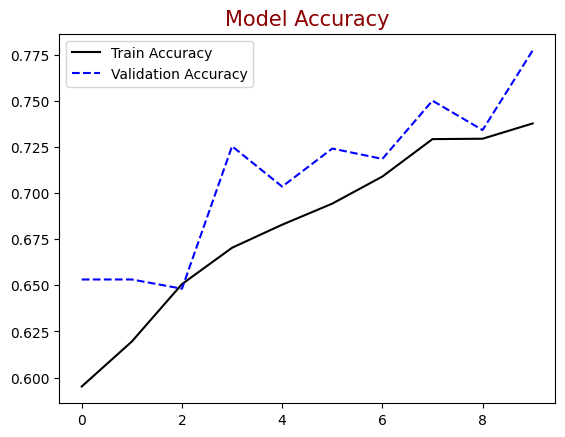

In [43]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(history .history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history .history["val_accuracy"],label = "Validation Accuracy", color = "blue", linestyle="dashed")
plt.title("Model Accuracy", color = "darkred", size = 15)
plt.legend()
plt.show()

In [44]:
# test dataset pipeline
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   test_subset,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 10925 files belonging to 22 classes.


In [45]:
#print training labels
ts_class_names = test_dataset.class_names
ts_class_names

['apple',
 'avocado',
 'banana',
 'blueberry',
 'cantaloupe',
 'cherry',
 'dragonfruit',
 'emblic',
 'grape',
 'guava',
 'jackfruit',
 'kiwi',
 'lychee',
 'mango',
 'orange',
 'papaya',
 'pear',
 'pineapple',
 'pomegranate',
 'raspberry',
 'strawberry',
 'watermelon']

first image to predict
actual label: cherry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
predicted label: cherry


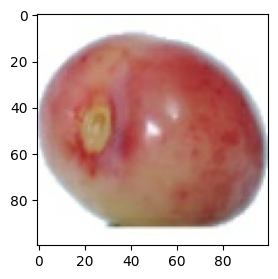

In [52]:
# Fetching model predictions for sample image in test dataset
plt.figure(figsize=(3, 3))
for images_batch, labels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",ts_class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",tr_class_names[np.argmax(batch_prediction[0])])

In [32]:
# Defining prediction function for testing images
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = ts_class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━

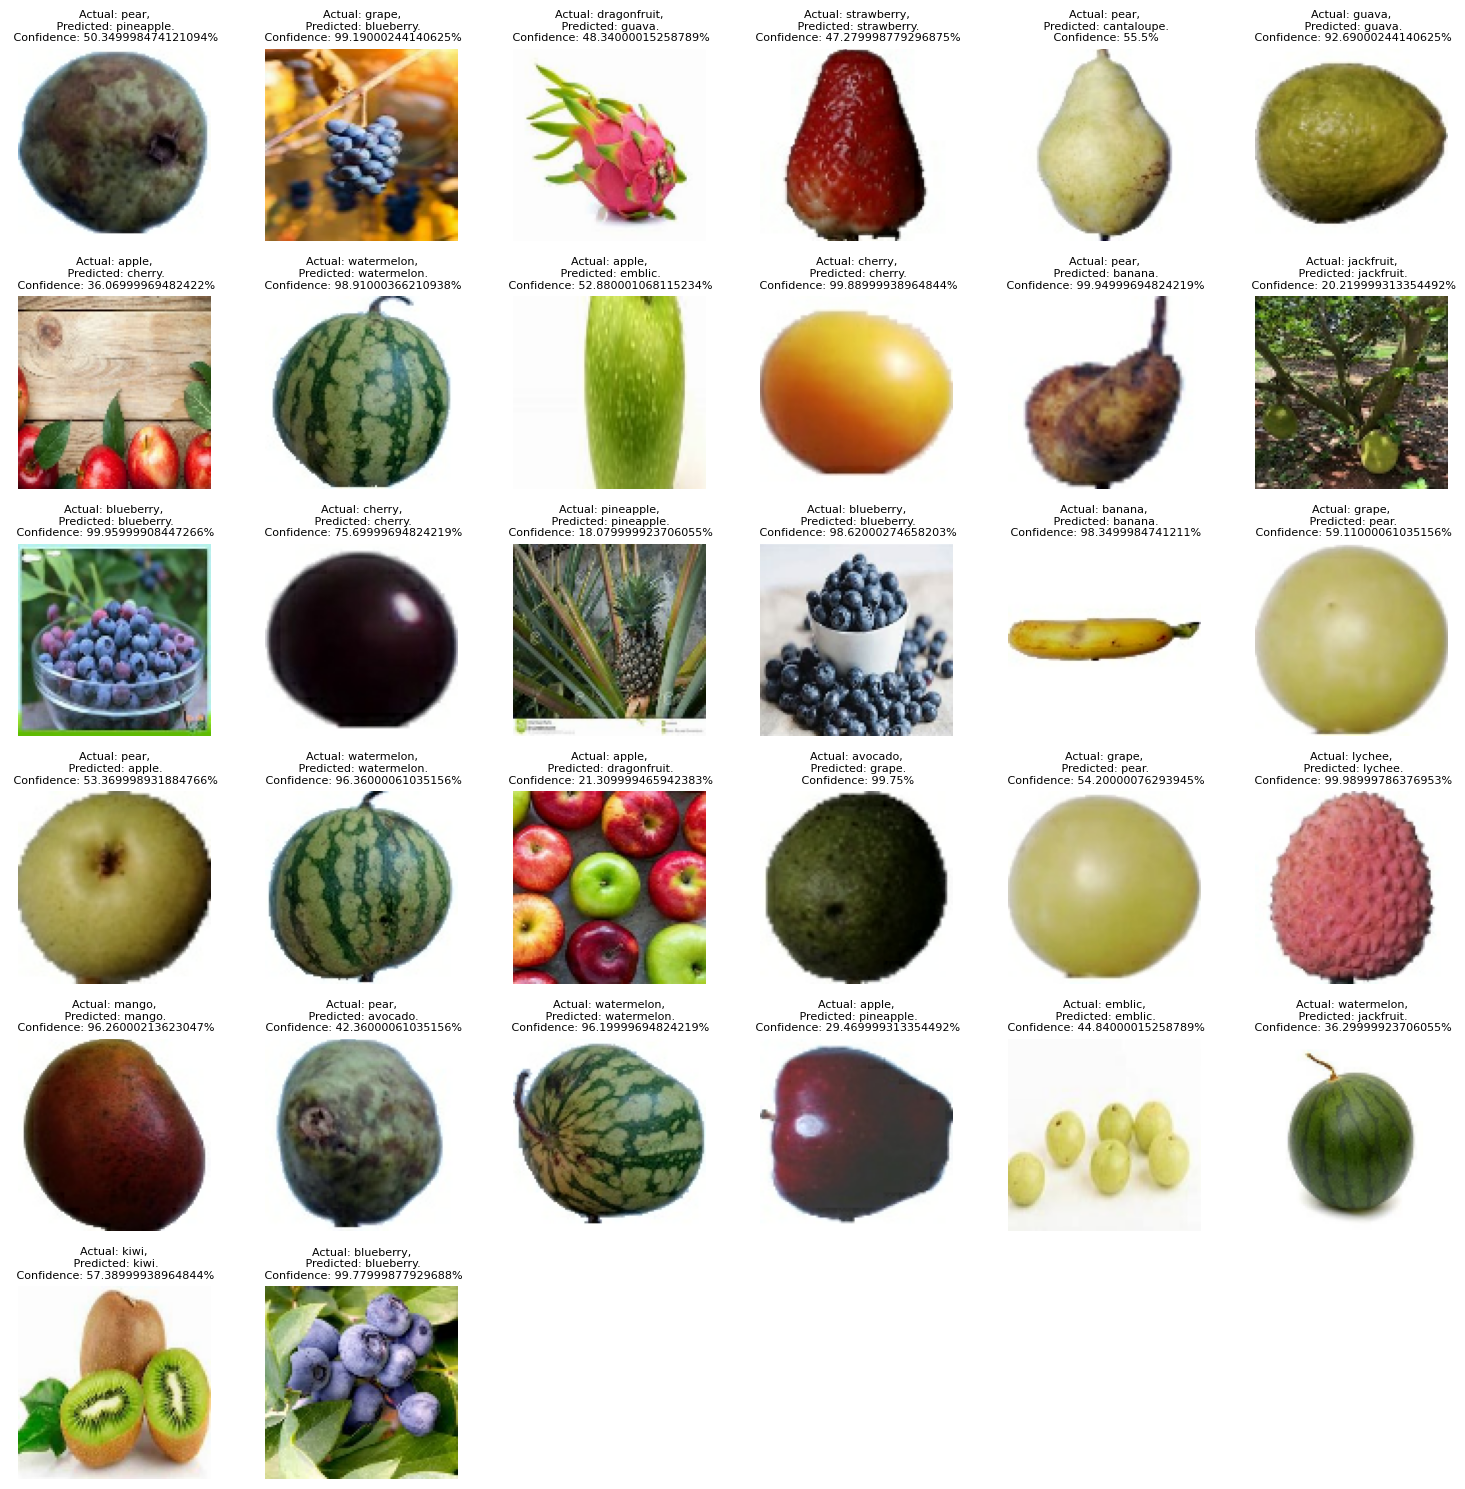

In [33]:
plt.figure(figsize=(15, 15))

# Iterate over the batches and then the images to display their predictions
BATCH_SIZE = 32
for images, labels in test_dataset.take(12):
    for i in range(BATCH_SIZE):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)
        plt.axis("off")

    # If there are more than batch size images, break out of the loop
    if i >= BATCH_SIZE - 1:
        break

# Hide any empty subplots
for i in range(i + 1, BATCH_SIZE):
    plt.subplot(6,6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━

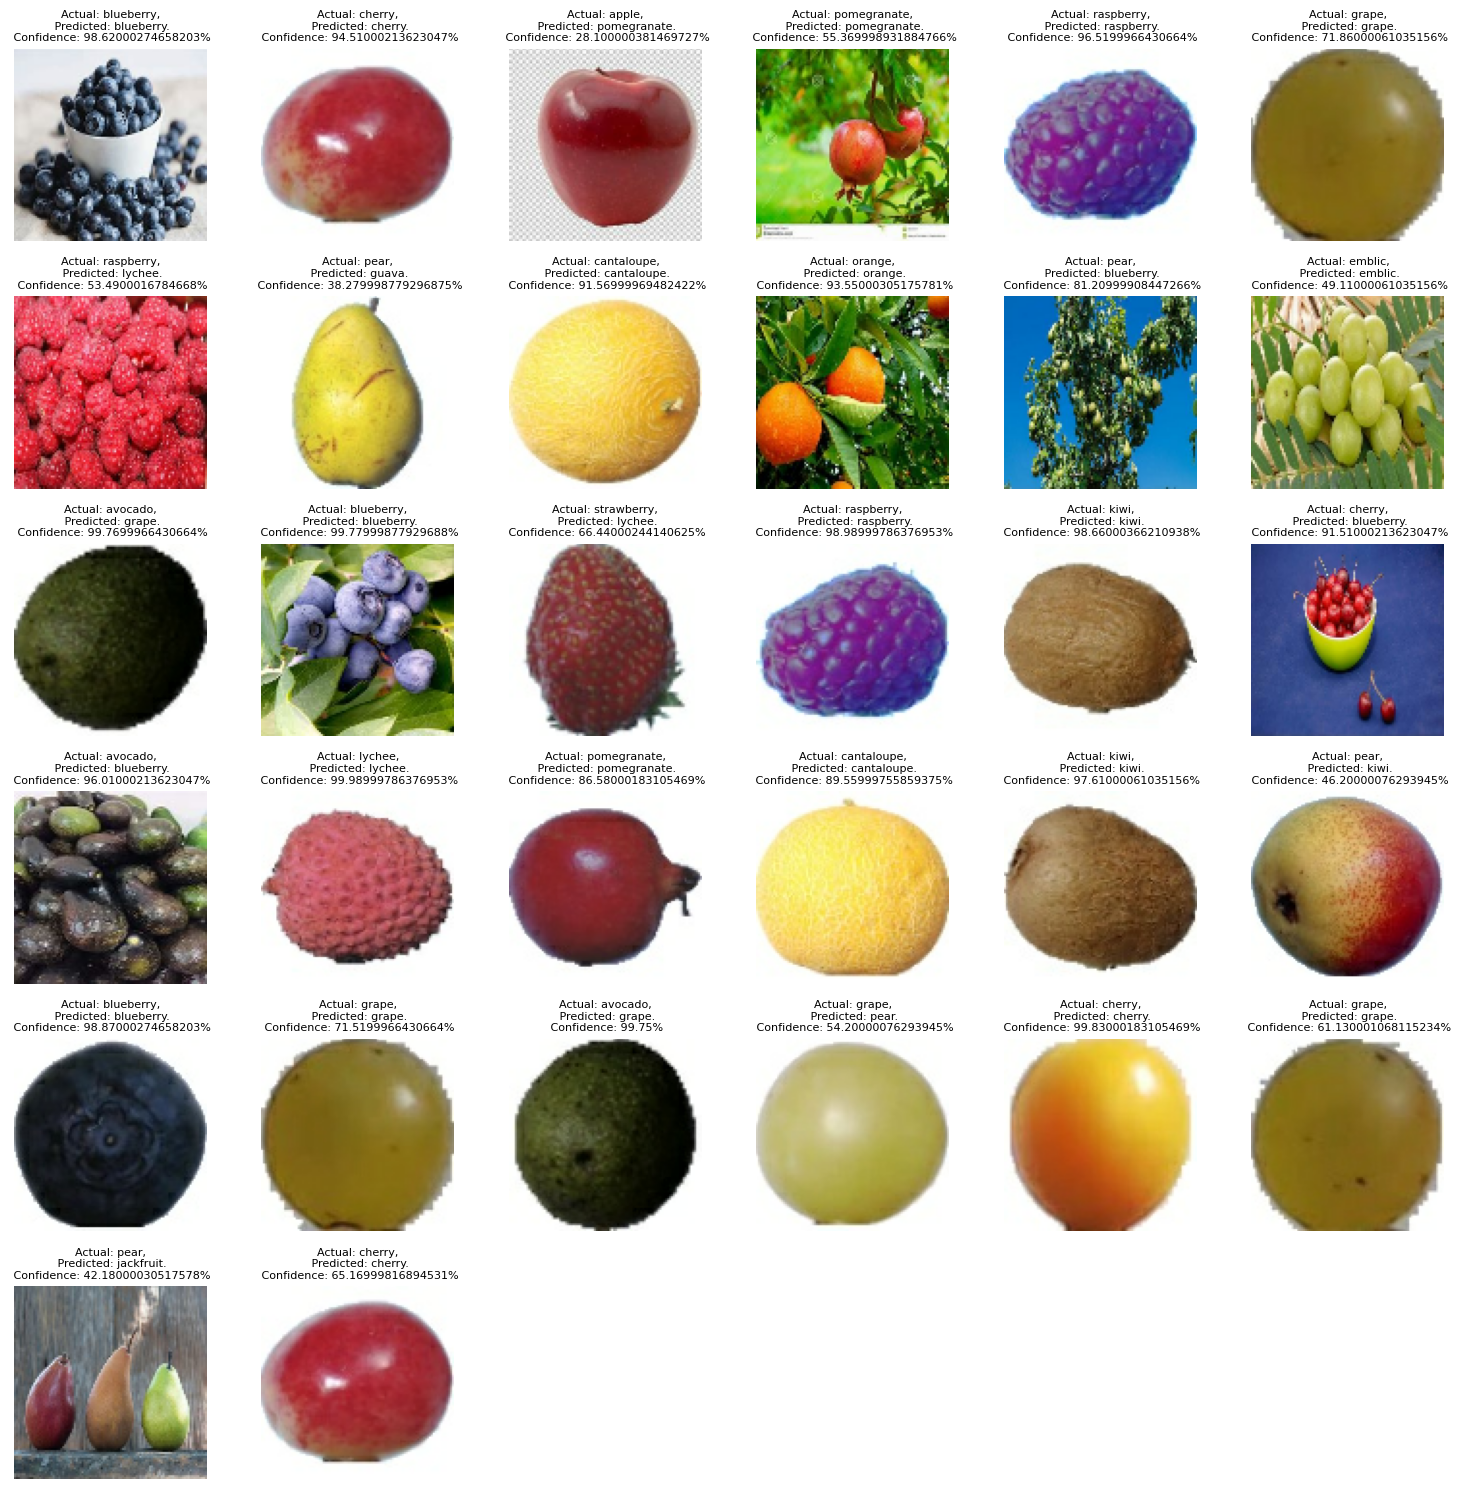

In [34]:
plt.figure(figsize=(15, 15))

# Iterate over the batches and then the images to display their predictions
BATCH_SIZE = 32
for images, labels in test_dataset.take(15):
    for i in range(BATCH_SIZE):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)
        plt.axis("off")

    # If there are more than batch size images, break out of the loop
    if i >= BATCH_SIZE - 1:
        break

# Hide any empty subplots
for i in range(i + 1, BATCH_SIZE):
    plt.subplot(6,6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()